## 1.3

We try to visualize columns that seems to be correlated (Assignment 1-1E) using boxplot.

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms

In [4]:
connections, devices, processes, profiles = pd.read_csv('data/connections.csv', sep='\t', keep_default_na=False), pd.read_csv('data/devices.csv', sep='\t', keep_default_na=False), pd.read_csv('data/processes.csv', sep='\t', keep_default_na=False), pd.read_csv('data/profiles.csv', sep='\t', keep_default_na=False)

<Axes: xlabel='mwra', ylabel='c.dogalize'>

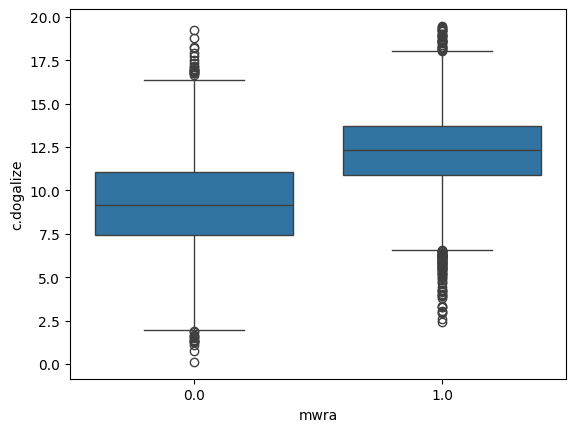

In [10]:
sns.boxplot(x='mwra', y='c.dogalize', data=connections)

<Axes: xlabel='mwra', ylabel='p.android.documentsui'>

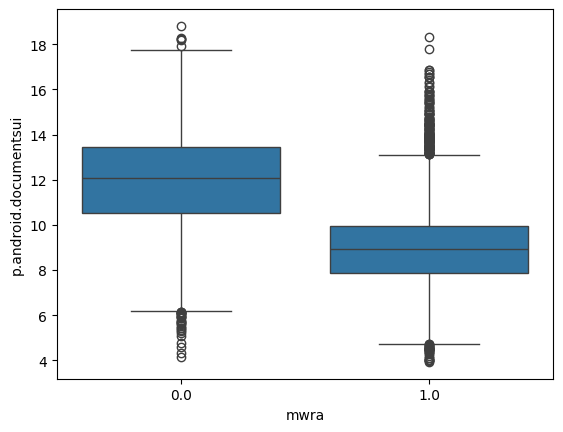

In [14]:
sns.boxplot(x='mwra', y='p.android.documentsui', data=processes)

<Axes: xlabel='mwra', ylabel='p.system'>

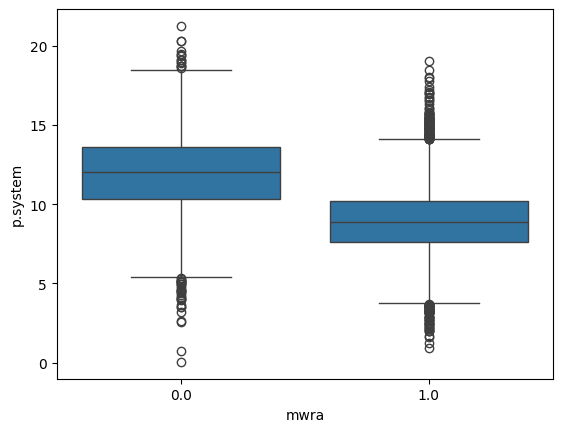

In [15]:
sns.boxplot(x='mwra', y='p.system', data=processes)

### Hypothesis verification No.1 (p.android.documentsui)

Null hypothesis H0: p.android.documentsui has an influence on malware-related-activity.  
Alternative hypothesis HA: p.android.documentsui has **no** influence on malware-related-activity.

In [16]:
documentsui = processes['p.android.documentsui']

In [17]:
documentsui.describe()

count    15074.000000
mean        10.088090
std          2.380393
min          3.929200
25%          8.362568
50%          9.740430
75%         11.652207
max         18.814960
Name: p.android.documentsui, dtype: float64

<Axes: xlabel='p.android.documentsui', ylabel='Count'>

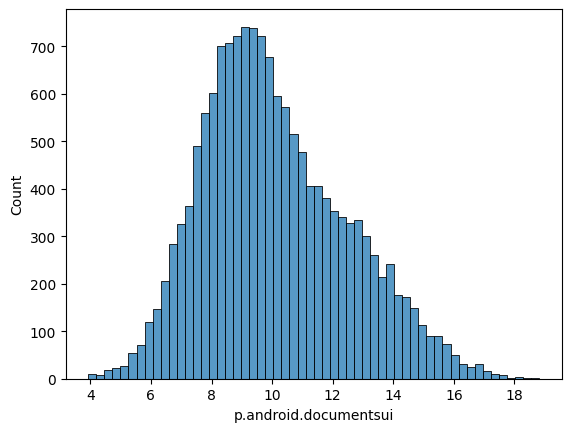

In [18]:
sns.histplot(documentsui)

In [19]:
def identify_outliers(a):
    lower = a.quantile(0.25) - 1.5 * stats.iqr(a)
    upper = a.quantile(0.75) + 1.5 * stats.iqr(a)
    
    return a[(a > upper) | (a < lower)]

In [20]:
documentsui_out = identify_outliers(documentsui)
documentsui_out

259      16.92096
280      17.11710
430      16.91931
527      16.85099
599      17.42537
           ...   
13960    17.17181
14258    18.23832
14269    16.84430
14430    17.11097
14896    16.61410
Name: p.android.documentsui, Length: 83, dtype: float64

In [21]:
documentsui = documentsui.drop(documentsui_out.index)

<Axes: xlabel='p.android.documentsui', ylabel='Count'>

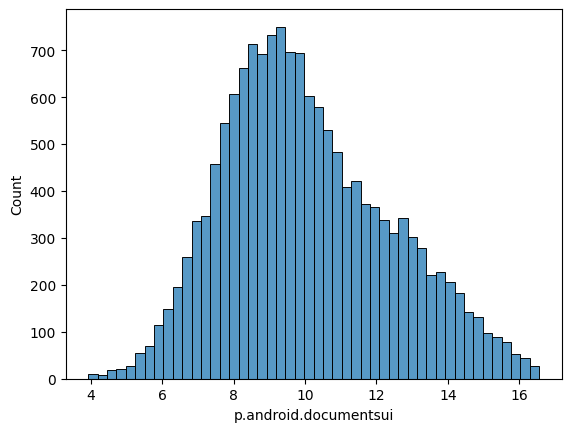

In [22]:
sns.histplot(documentsui)

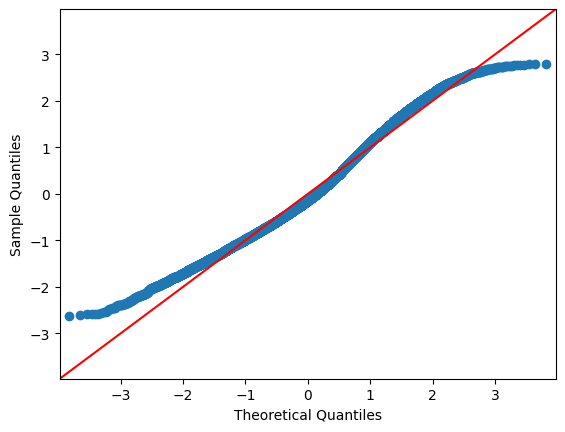

In [29]:
_ = sm.ProbPlot(documentsui, fit=True).qqplot(line='45')

light tailed qqplot

In [30]:
stats.shapiro(documentsui)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 14991.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=np.float64(0.982122647609474), pvalue=np.float64(2.2519661157744816e-39))

pvalue < 0.05, therefore we **REJECT** the null hypothesis.

### Hypothesis verification No.2 (c.dogalize)

In [33]:
dogalize = connections['c.dogalize']

In [34]:
dogalize.describe()

count    15074.000000
mean        11.159652
std          2.787612
min          0.113470
25%          9.342795
50%         11.410130
75%         13.140740
max         19.477060
Name: c.dogalize, dtype: float64

<Axes: xlabel='c.dogalize', ylabel='Count'>

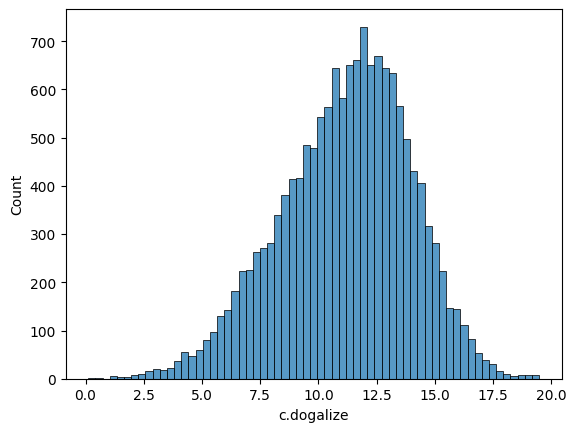

In [35]:
sns.histplot(dogalize)

In [36]:
dogalize_out = identify_outliers(dogalize)
dogalize_out

62       19.30708
77       19.38697
157       2.96944
159       2.94541
369       3.07539
           ...   
14689     1.66970
14763    19.18080
14869     3.46320
14890     2.81685
14930     3.07539
Name: c.dogalize, Length: 115, dtype: float64

In [37]:
dogalize = dogalize.drop(dogalize_out.index)

<Axes: xlabel='c.dogalize', ylabel='Count'>

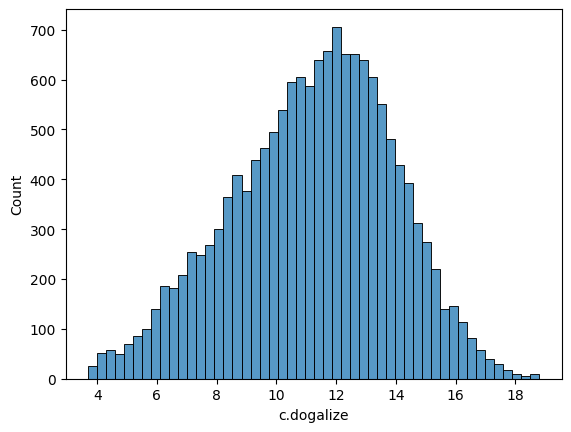

In [38]:
sns.histplot(dogalize)

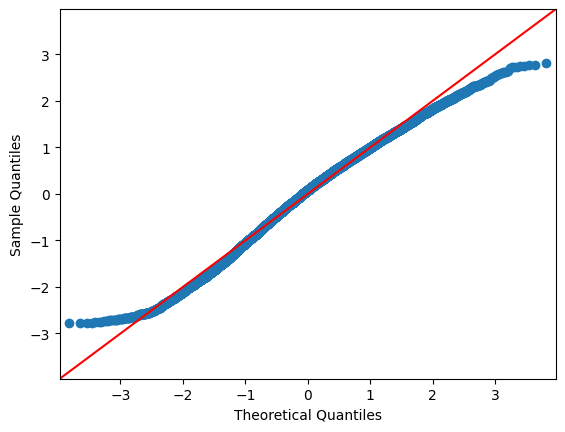

In [39]:
_ = sm.ProbPlot(dogalize, fit=True).qqplot(line='45')

light tailed

In [41]:
stats.shapiro(dogalize)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 14959.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=np.float64(0.9923051022783509), pvalue=np.float64(1.9079998299952295e-27))

pvalue < 0.05, therefore we **REJECT** the null hypothesis.